In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
import pandas as pd

# Set random seed for reproducibility (optional)
np.random.seed(42)
random.seed(42)

# Module 1: Inertial Navigation System (INS) with Cross-Validation
class InertialNavigationSystem:
    def __init__(self, initial_position, initial_velocity):
        self.position = np.array(initial_position, dtype=float)
        self.velocity = np.array(initial_velocity, dtype=float)
        self.position_history = []
        self.velocity_history = []
        self.accelerations = []
        self.num_sensors = 3  # Number of redundant sensors

    def update(self, acceleration, dt, attack=False):
        # Simulate readings from multiple sensors
        sensor_readings = []
        for i in range(self.num_sensors):
            acc = np.array(acceleration, dtype=float)
            if attack and i == 0:
                # Attack affects only the first sensor
                noise = np.random.normal(0, 0.5, size=2)
                bias = np.array([0.1, -0.1])
                acc += noise + bias
            sensor_readings.append(acc)

        # Cross-Validation Mechanism
        sensor_readings = np.array(sensor_readings)
        median_acceleration = np.median(sensor_readings, axis=0)
        self.accelerations.append(median_acceleration)

        # Update velocity and position using the median acceleration
        self.velocity += median_acceleration * dt
        self.position += self.velocity * dt
        self.velocity_history.append(self.velocity.copy())
        self.position_history.append(self.position.copy())
        return self.position

# Module 2: Sonar System with Cross-Validation
# Module 2: Sonar System with Cross-Validation
class SonarSystem:
    def __init__(self, obstacle_positions):
        self.obstacle_positions = obstacle_positions
        self.detections = []
        self.num_sonars = 3  # Number of redundant sonar systems

    def detect_obstacles(self, submarine_position, attack=False, sonar_id=0):
        detections = []
        for obs_pos in self.obstacle_positions:
            distance = np.linalg.norm(obs_pos - submarine_position)
            if distance < 50:
                detections.append((tuple(obs_pos), distance))  # Convert obs_pos to tuple
        if attack and sonar_id == 0:
            for _ in range(10):
                fake_pos = submarine_position + np.random.uniform(-50, 50, size=2)
                detections.append((tuple(fake_pos), np.linalg.norm(fake_pos - submarine_position)))  # Convert fake_pos to tuple
        return detections

# Module 3: Depth Control System with Cross-Validation
class DepthControlSystem:
    def __init__(self, target_depth):
        self.target_depth = target_depth
        self.current_depth = 0.0
        self.depth_history = []
        self.num_sensors = 3  # Number of redundant depth sensors

    def adjust_depth(self, attack=False):
        sensor_readings = []
        for i in range(self.num_sensors):
            depth_sensor_reading = self.current_depth + np.random.randn() * 2.0
            if attack and i == 0:
                # Attack affects only the first sensor
                noise = np.random.uniform(-20, 20)
                depth_sensor_reading += noise
            sensor_readings.append(depth_sensor_reading)

        # Cross-Validation Mechanism
        # Use the median of the sensor readings
        median_depth_reading = np.median(sensor_readings)

        depth_error = self.target_depth - median_depth_reading
        adjustment = depth_error * 0.1
        self.current_depth += adjustment
        self.depth_history.append(self.current_depth)
        return self.current_depth

# Module 4: GPS with Cross-Validation
class GPS:
    def __init__(self, position_noise_std):
        self.position_noise_std = position_noise_std
        self.position_history = []
        self.num_receivers = 3  # Number of redundant GPS receivers

    def get_position(self, true_position, attack=False):
        positions = []
        for i in range(self.num_receivers):
            noisy_position = true_position + np.random.randn(2) * self.position_noise_std
            if attack and i == 0:
                # Attack affects only the first receiver
                spoofing_error = np.random.uniform(-100, 100, size=2)
                noisy_position += spoofing_error
            positions.append(noisy_position)

        # Cross-Validation Mechanism
        # Use the median position
        positions = np.array(positions)
        median_position = np.median(positions, axis=0)
        self.position_history.append(median_position)
        return median_position

# Module 5: Collision Avoidance System with Cross-Validation
class CollisionAvoidanceSystem:
    def __init__(self):
        self.evasive_actions = []
        self.num_systems = 3  # Number of redundant systems

    def avoid_collision(self, detections_list, attack=False):
        actions = []
        for i in range(self.num_systems):
            detections = detections_list[i]
            action_taken = False
            if detections and not (attack and i == 0 and random.random() < 0.3):
                action_taken = True
            actions.append(action_taken)

        # Cross-Validation Mechanism
        # Use majority voting
        action_taken = sum(actions) > self.num_systems / 2
        return action_taken

# Module 6: Autopilot System with Cross-Validation
class AutopilotSystem:
    def __init__(self, target_course):
        self.target_course = target_course
        self.current_course = random.uniform(0, 360)
        self.course_history = []
        self.num_units = 3  # Number of redundant autopilot units

    def adjust_course(self, attack=False):
        adjustments = []
        for i in range(self.num_units):
            course_error = self.target_course - self.current_course
            adjustment = course_error * 0.1
            if attack and i == 0:
                # Attack affects only the first unit
                noise = np.random.uniform(-5, 5)
                adjustment += noise
            adjustments.append(adjustment)

        # Cross-Validation Mechanism
        # Use the median adjustment
        median_adjustment = np.median(adjustments)
        self.current_course += median_adjustment
        self.course_history.append(self.current_course)
        return self.current_course

# Module 7: Sensor Fusion (Kalman Filter) with Cross-Validation
class SensorFusion:
    def __init__(self):
        self.kf = KalmanFilter(dim_x=4, dim_z=2)
        dt = 1.0
        self.kf.F = np.array([[1, dt, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, dt],
                              [0, 0, 0, 1]])
        self.kf.H = np.array([[1, 0, 0, 0],
                              [0, 0, 1, 0]])
        self.kf.P *= 1000
        self.kf.R = np.eye(2) * 5
        self.kf.Q = np.eye(4) * 0.1
        self.fused_positions = []
        self.kf.x = np.zeros(4)
        self.num_measurements = 3  # Number of redundant measurements

    def update(self, measurement, attack=False):
        measurements = []
        for i in range(self.num_measurements):
            meas = np.array(measurement, dtype=float)
            if attack and i == 0:
                # Attack affects only the first measurement
                noise = np.random.uniform(-50, 50, size=2)
                meas += noise
            measurements.append(meas)

        # Cross-Validation Mechanism
        # Use the median measurement
        measurements = np.array(measurements)
        median_measurement = np.median(measurements, axis=0)

        self.kf.predict()
        self.kf.update(median_measurement)
        position_estimate = self.kf.x[[0, 2]]
        self.fused_positions.append(position_estimate.copy())
        return position_estimate


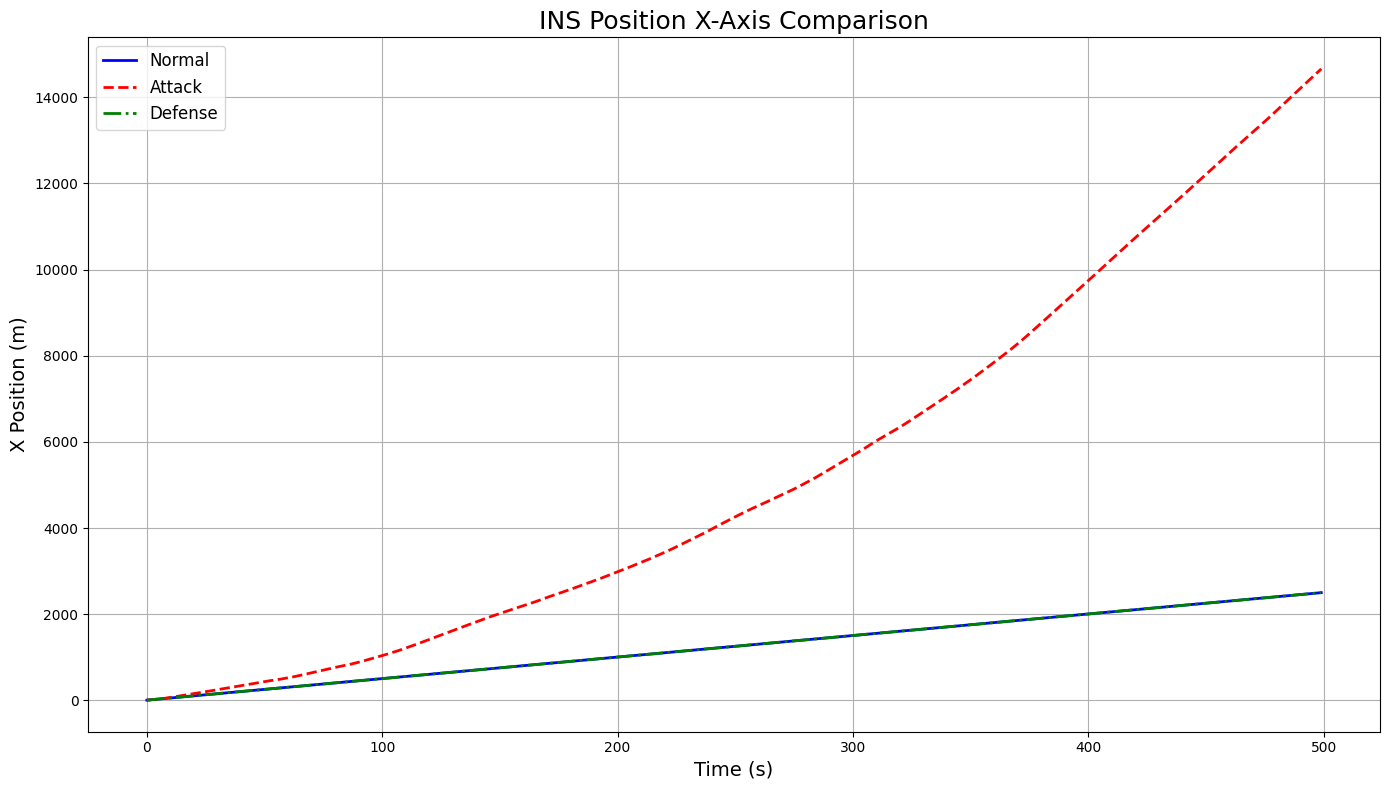

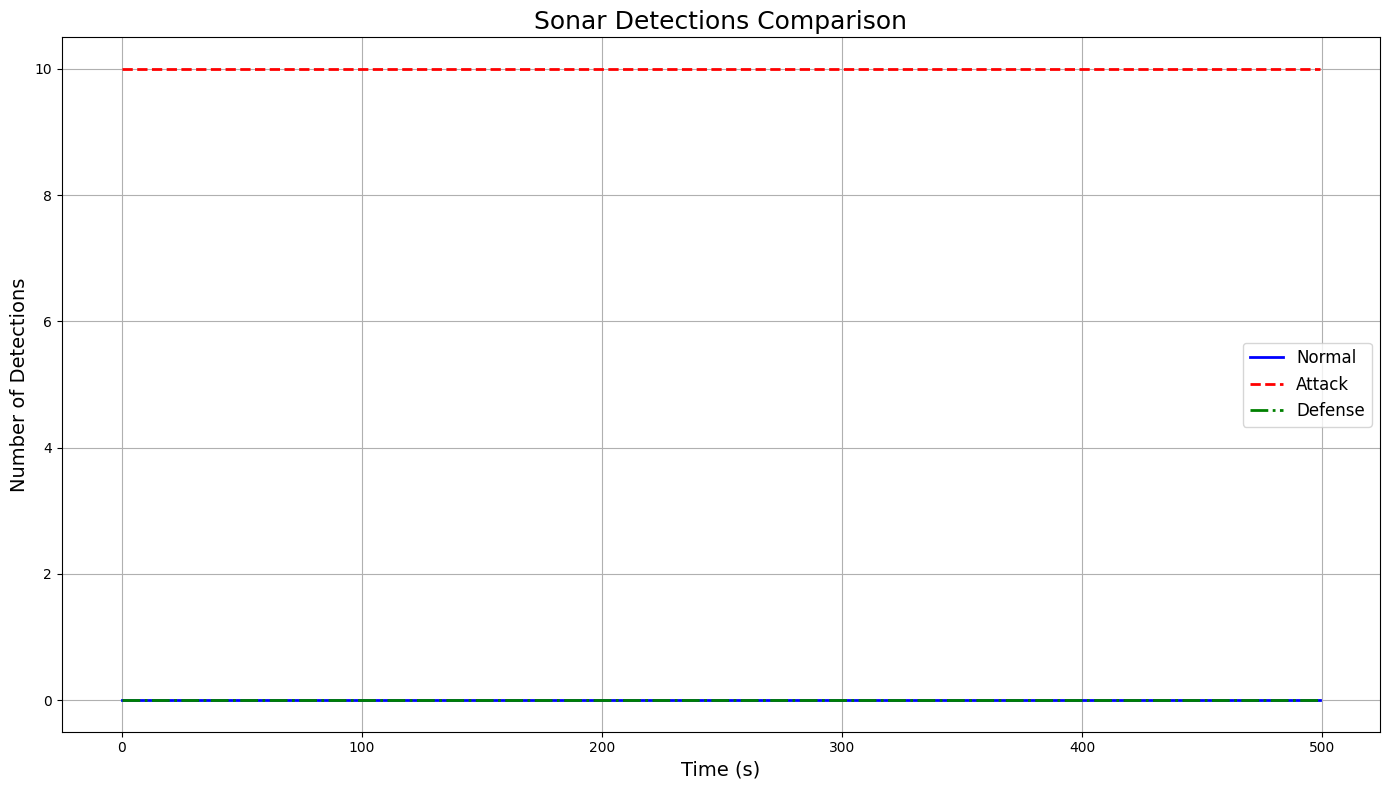

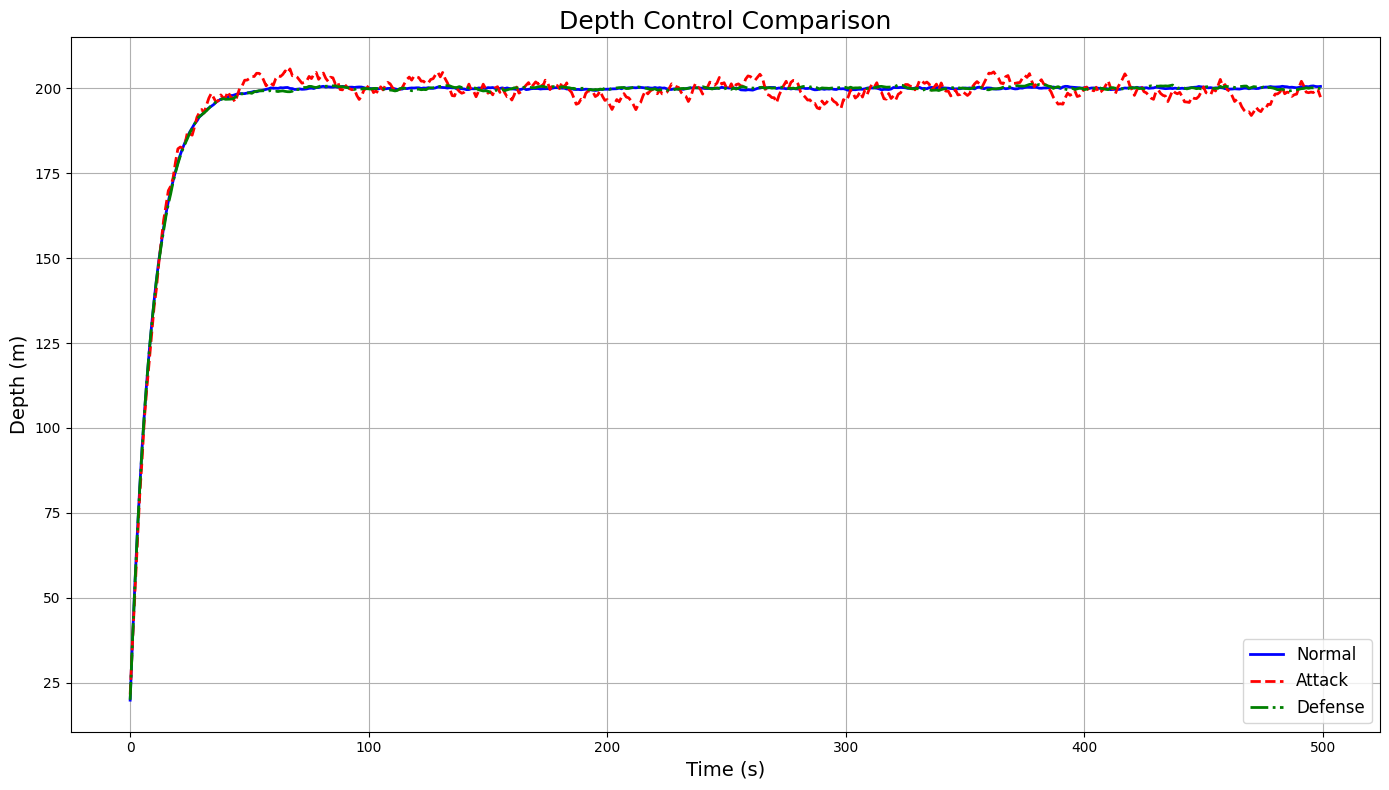

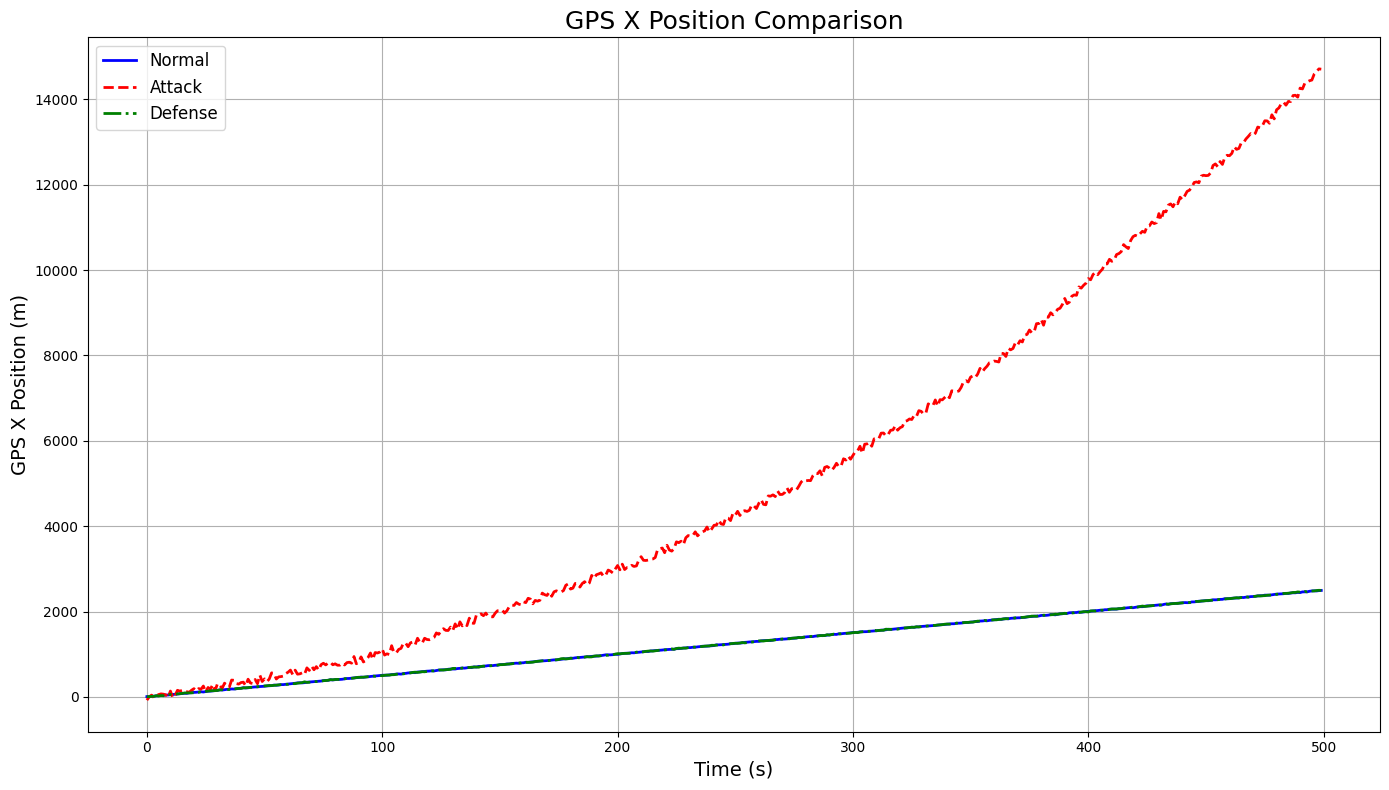

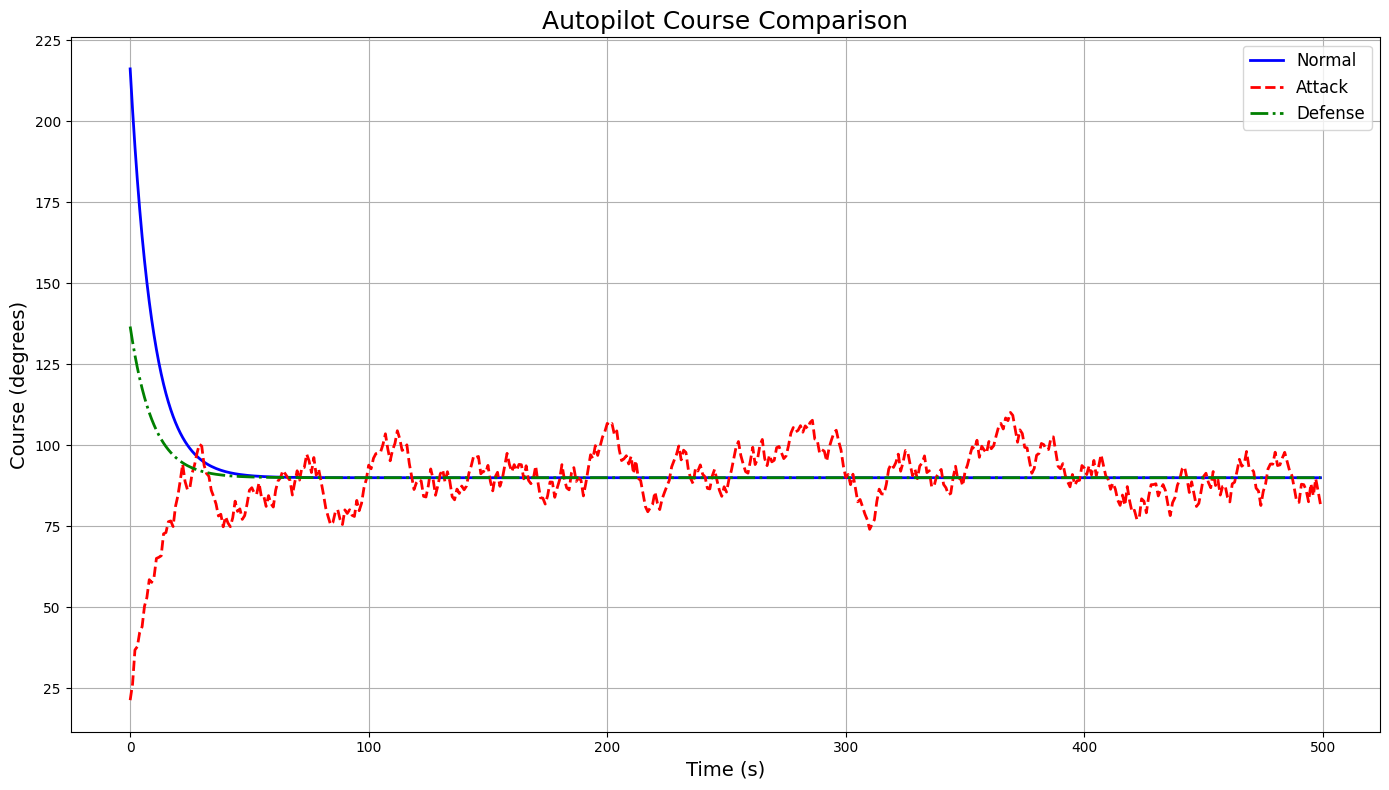

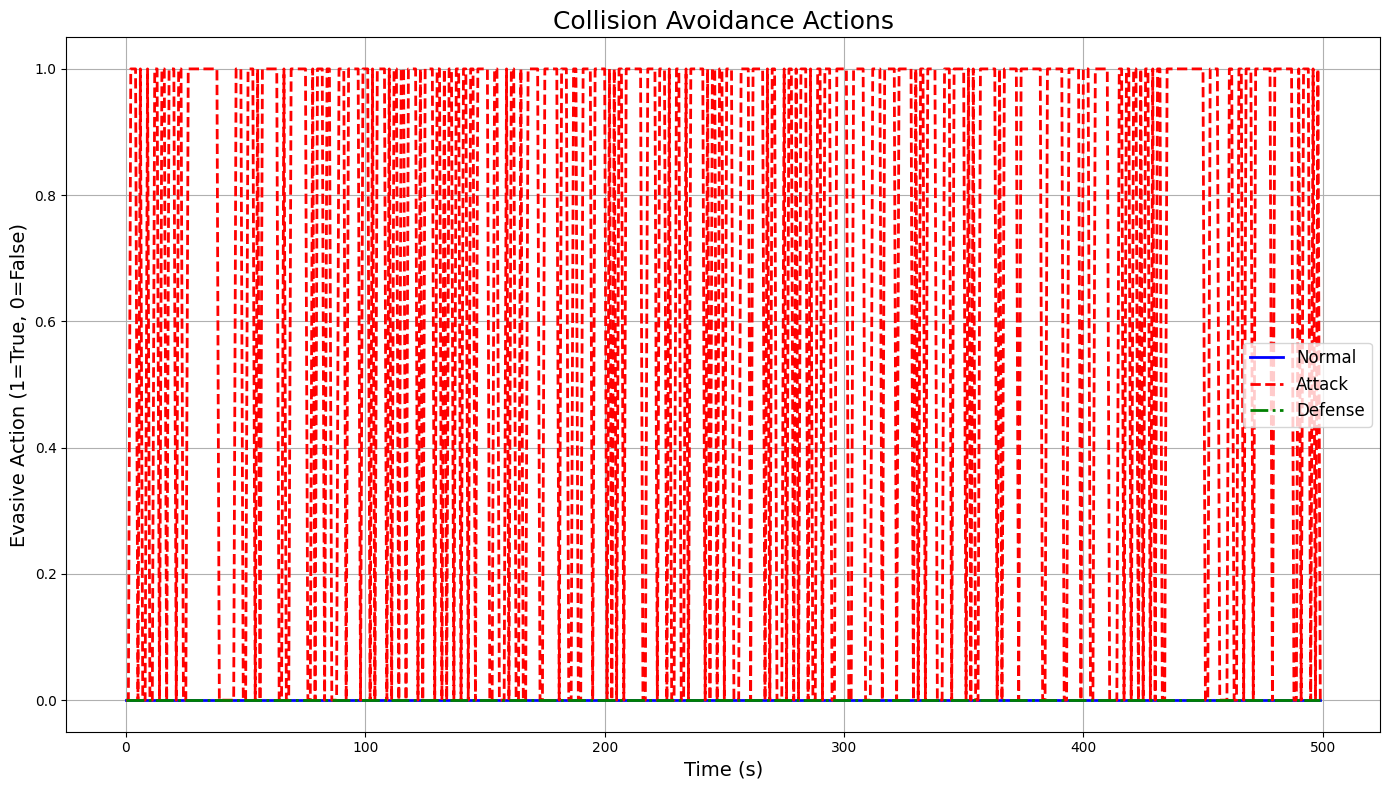

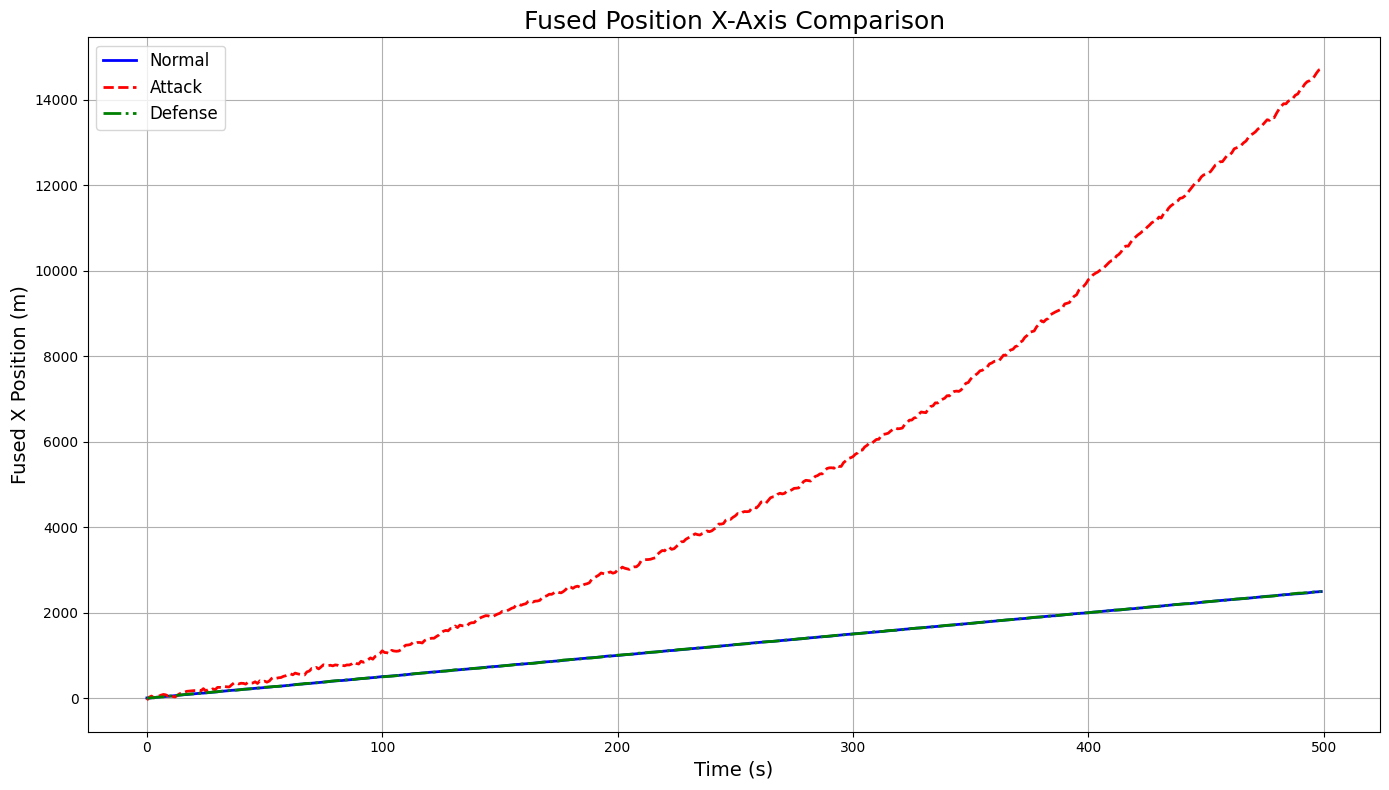

In [2]:

# Main Navigation System with Cross-Validation Mechanisms
class SubmarineNavigationSystem:
    def __init__(self, simulation_time, time_step):
        self.simulation_time = simulation_time
        self.time_step = time_step
        self.dt = time_step
        self.time_steps = int(simulation_time / time_step)
        self.time = np.arange(0, simulation_time, time_step)
        self.ins = InertialNavigationSystem([0.0, 0.0], [5.0, 0.0])
        self.sonar = SonarSystem([np.array([200, 50]), np.array([400, -100])])
        self.depth_control = DepthControlSystem(200.0)
        self.gps = GPS(5.0)
        self.collision_avoidance = CollisionAvoidanceSystem()
        self.autopilot = AutopilotSystem(90.0)
        self.sensor_fusion = SensorFusion()

    def simulate(self, attack=False):
        for t in self.time:
            acceleration = [0.0, 0.0]
            ins_position = self.ins.update(acceleration, self.dt, attack=attack)
            detections_list = []
            for i in range(self.sonar.num_sonars):
                detections = self.sonar.detect_obstacles(ins_position, attack=attack, sonar_id=i)
                detections_list.append(detections)
            # Cross-Validation Mechanism
            # Find common detections across all sonar systems
            common_detections = set(detections_list[0])
            for detections in detections_list[1:]:
                common_detections.intersection_update(set(detections))
            # Record the number of common detections once per time step
            self.sonar.detections.append(len(common_detections))

            action_taken = self.collision_avoidance.avoid_collision(detections_list, attack=attack)
            self.collision_avoidance.evasive_actions.append(action_taken)

            self.depth_control.adjust_depth(attack=attack)
            gps_position = self.gps.get_position(ins_position, attack=attack)
            self.autopilot.adjust_course(attack=attack)
            self.sensor_fusion.update(gps_position, attack=attack)

    def run_and_compare(self):
        # Run simulation before any attack (normal conditions)
        self.simulate()
        ins_positions_normal = np.array(self.ins.position_history)
        sonar_detections_normal = np.array(self.sonar.detections)
        depth_history_normal = np.array(self.depth_control.depth_history)
        gps_positions_normal = np.array(self.gps.position_history)
        course_history_normal = np.array(self.autopilot.course_history)
        evasive_actions_normal = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_normal = np.array(self.sensor_fusion.fused_positions)

        # Run simulation with attacks enabled and without cross-validation
        self.__init__(self.simulation_time, self.time_step)  # Reset system
        # Temporarily disable cross-validation by setting num_sensors to 1
        self.ins.num_sensors = 1
        self.sonar.num_sonars = 1
        self.depth_control.num_sensors = 1
        self.gps.num_receivers = 1
        self.collision_avoidance.num_systems = 1
        self.autopilot.num_units = 1
        self.sensor_fusion.num_measurements = 1
        self.simulate(attack=True)
        ins_positions_attacked = np.array(self.ins.position_history)
        sonar_detections_attacked = np.array(self.sonar.detections)
        depth_history_attacked = np.array(self.depth_control.depth_history)
        gps_positions_attacked = np.array(self.gps.position_history)
        course_history_attacked = np.array(self.autopilot.course_history)
        evasive_actions_attacked = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_attacked = np.array(self.sensor_fusion.fused_positions)

        # Run simulation with attacks enabled and cross-validation mechanisms
        self.__init__(self.simulation_time, self.time_step)  # Reset system
        self.simulate(attack=True)
        ins_positions_defended = np.array(self.ins.position_history)
        sonar_detections_defended = np.array(self.sonar.detections)
        depth_history_defended = np.array(self.depth_control.depth_history)
        gps_positions_defended = np.array(self.gps.position_history)
        course_history_defended = np.array(self.autopilot.course_history)
        evasive_actions_defended = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_defended = np.array(self.sensor_fusion.fused_positions)

        # Plotting results
        self.plot_comprehensive_comparison(
            ins_positions_normal[:, 0], ins_positions_attacked[:, 0], ins_positions_defended[:, 0],
            'INS Position X-Axis Comparison', 'X Position (m)')
        self.plot_comprehensive_comparison(
            sonar_detections_normal, sonar_detections_attacked, sonar_detections_defended,
            'Sonar Detections Comparison', 'Number of Detections')
        self.plot_comprehensive_comparison(
            depth_history_normal, depth_history_attacked, depth_history_defended,
            'Depth Control Comparison', 'Depth (m)')
        self.plot_comprehensive_comparison(
            [pos[0] for pos in gps_positions_normal], [pos[0] for pos in gps_positions_attacked],
            [pos[0] for pos in gps_positions_defended], 'GPS X Position Comparison', 'GPS X Position (m)')
        self.plot_comprehensive_comparison(
            course_history_normal, course_history_attacked, course_history_defended,
            'Autopilot Course Comparison', 'Course (degrees)')
        self.plot_comprehensive_comparison(
            evasive_actions_normal, evasive_actions_attacked, evasive_actions_defended,
            'Collision Avoidance Actions', 'Evasive Action (1=True, 0=False)')
        self.plot_comprehensive_comparison(
            [pos[0] for pos in fused_positions_normal], [pos[0] for pos in fused_positions_attacked],
            [pos[0] for pos in fused_positions_defended], 'Fused Position X-Axis Comparison', 'Fused X Position (m)')

    def plot_comprehensive_comparison(self, normal_data, attacked_data, defended_data, title, y_label):
        plt.figure(figsize=(14, 8))
        plt.plot(self.time, normal_data, label='Normal', color='blue', linewidth=2)
        plt.plot(self.time, attacked_data, label='Attack', color='red', linestyle='--', linewidth=2)
        plt.plot(self.time, defended_data, label='Defense', color='green', linestyle='-.', linewidth=2)
        plt.title(title, fontsize=18)
        plt.xlabel('Time (s)', fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        

# Run the simulation and generate results
if __name__ == "__main__":
    submarine_system = SubmarineNavigationSystem(500.0, 1.0)  # Adjust simulation time as needed
    submarine_system.run_and_compare()

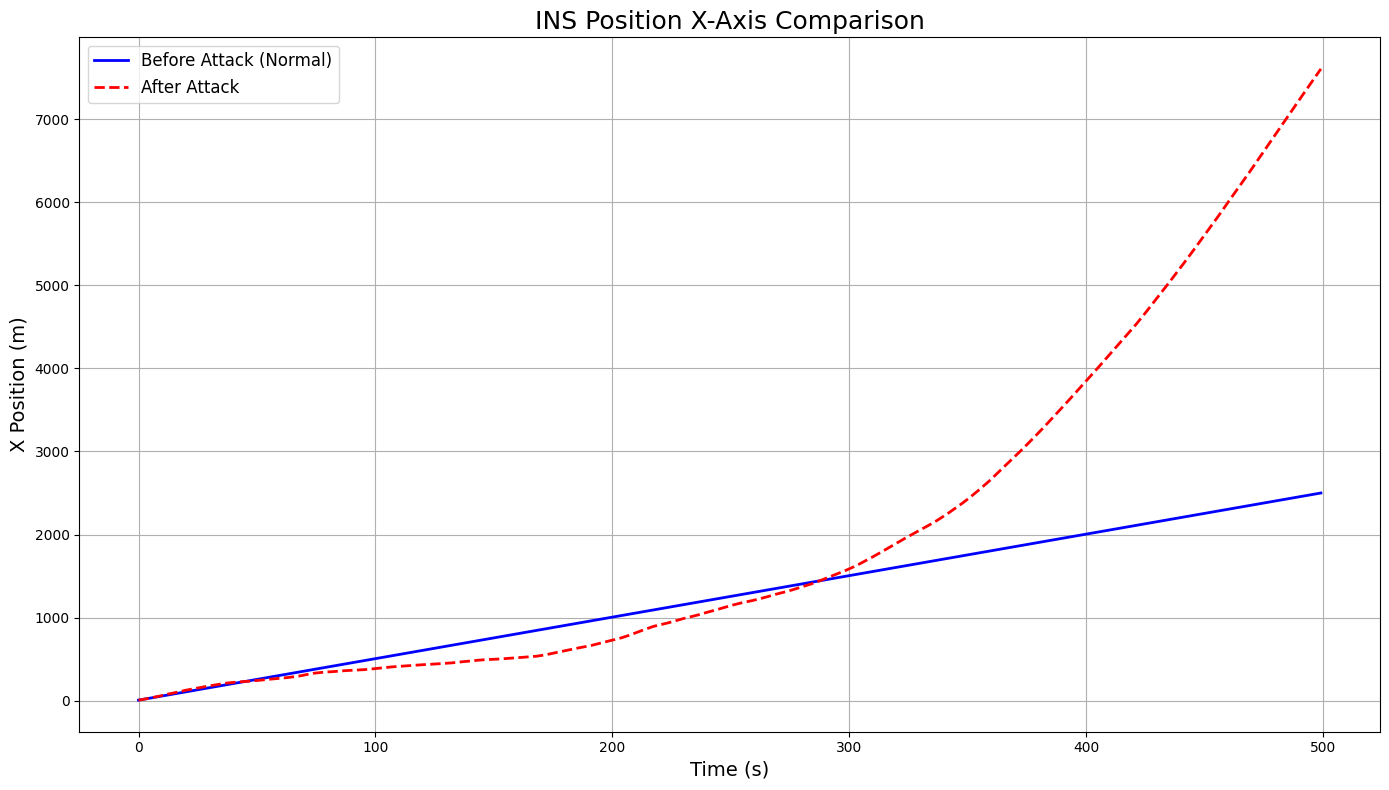

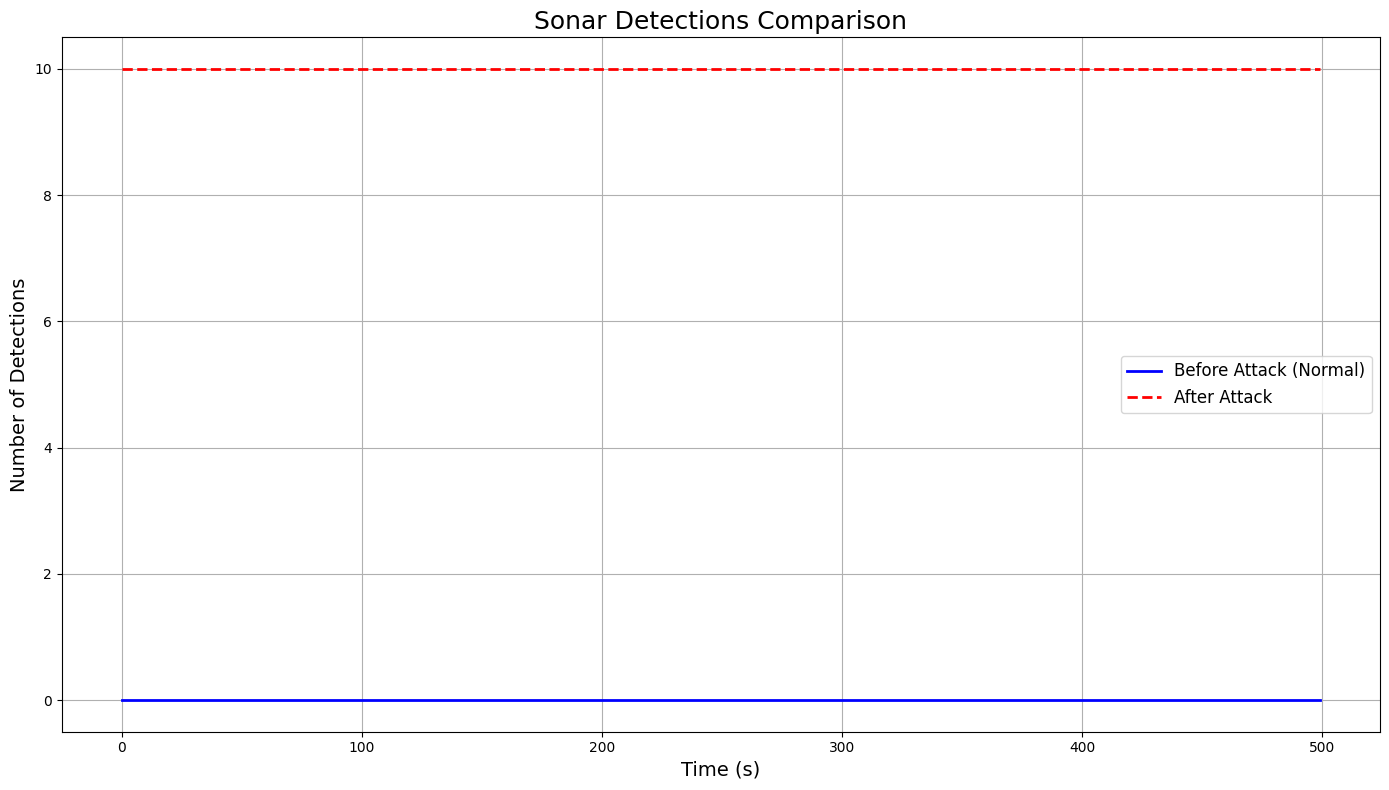

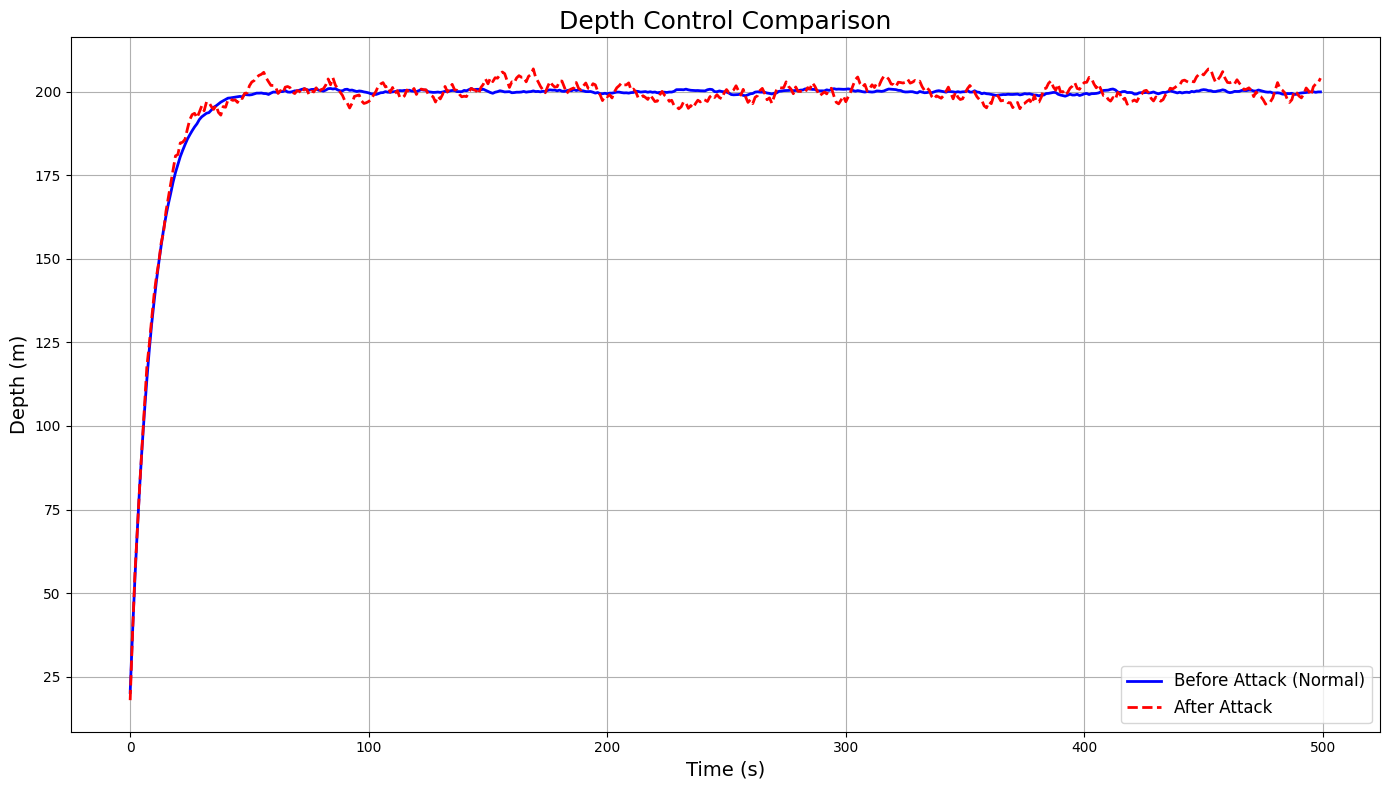

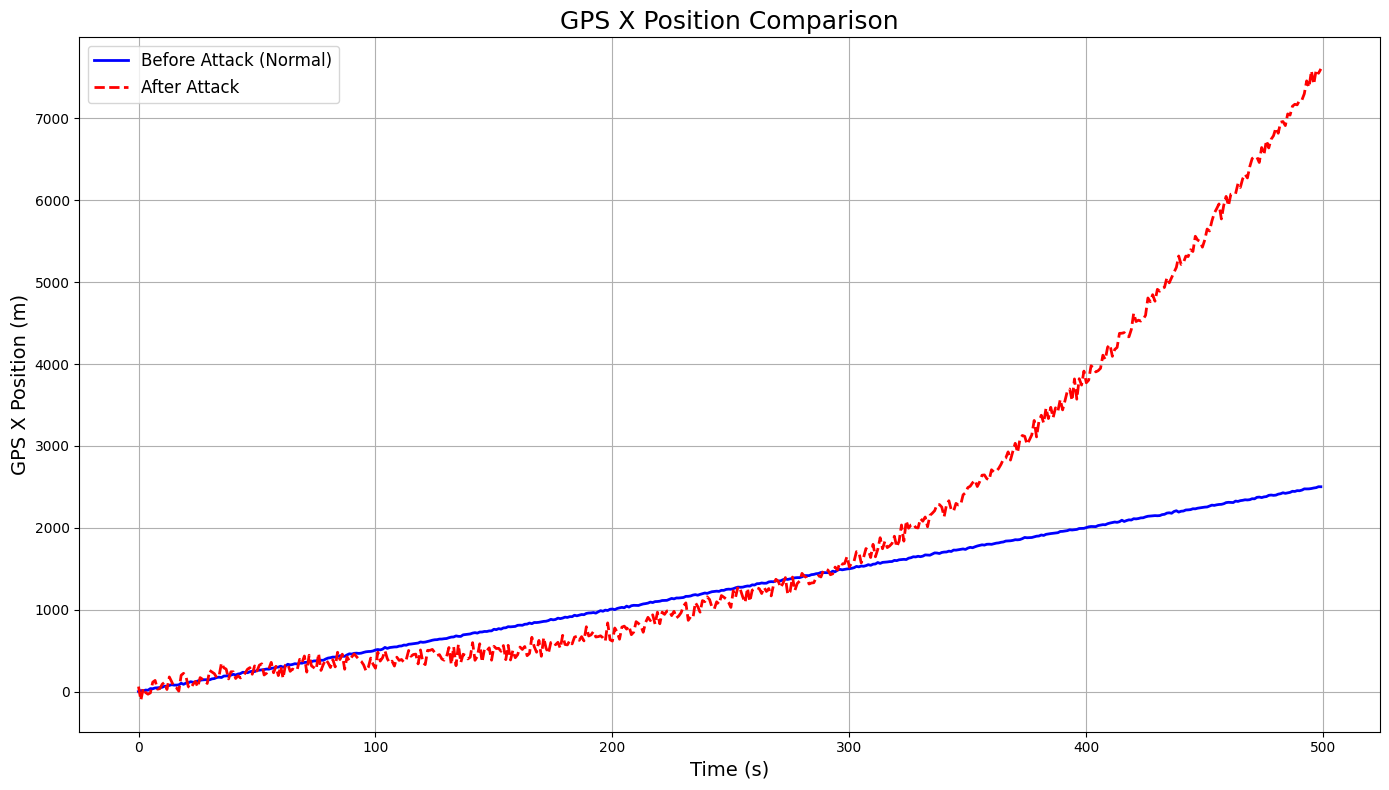

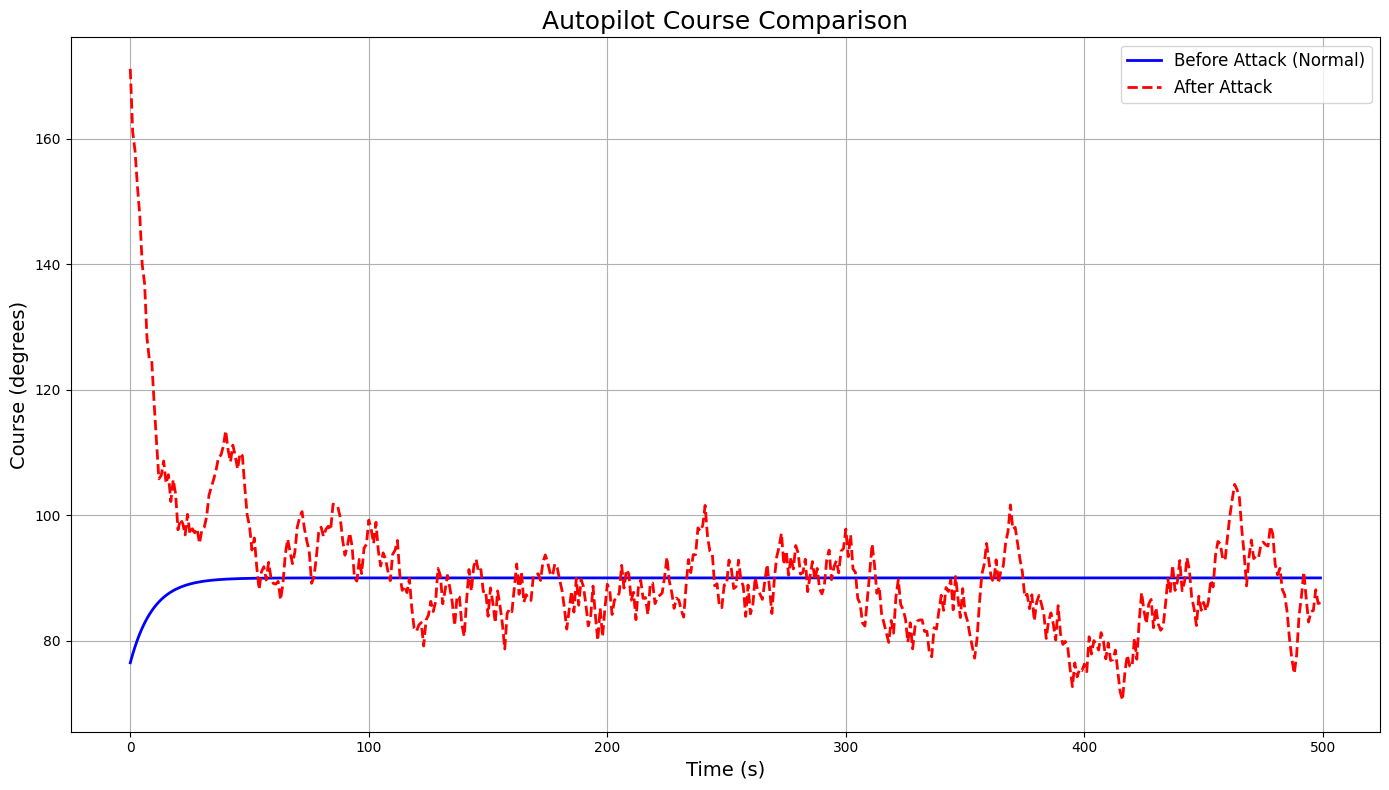

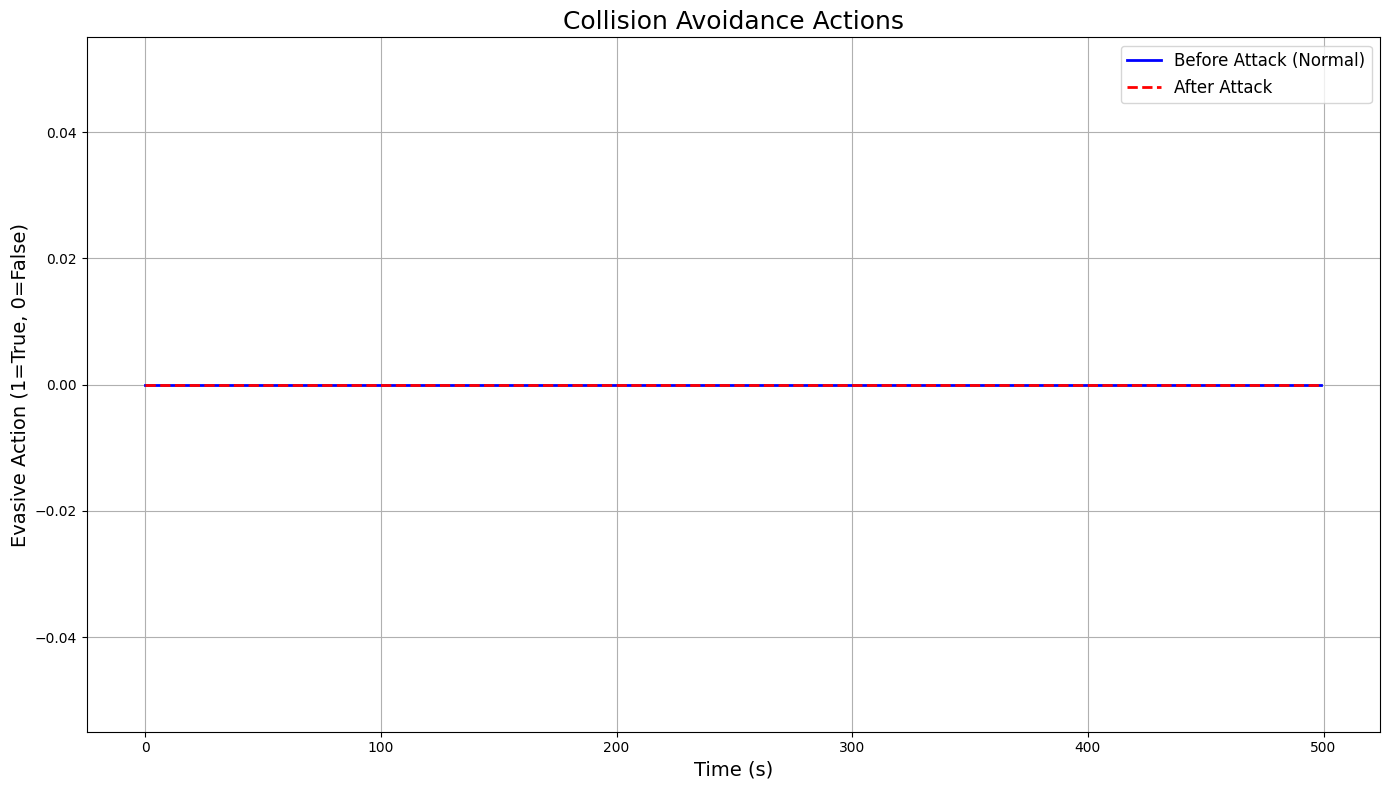

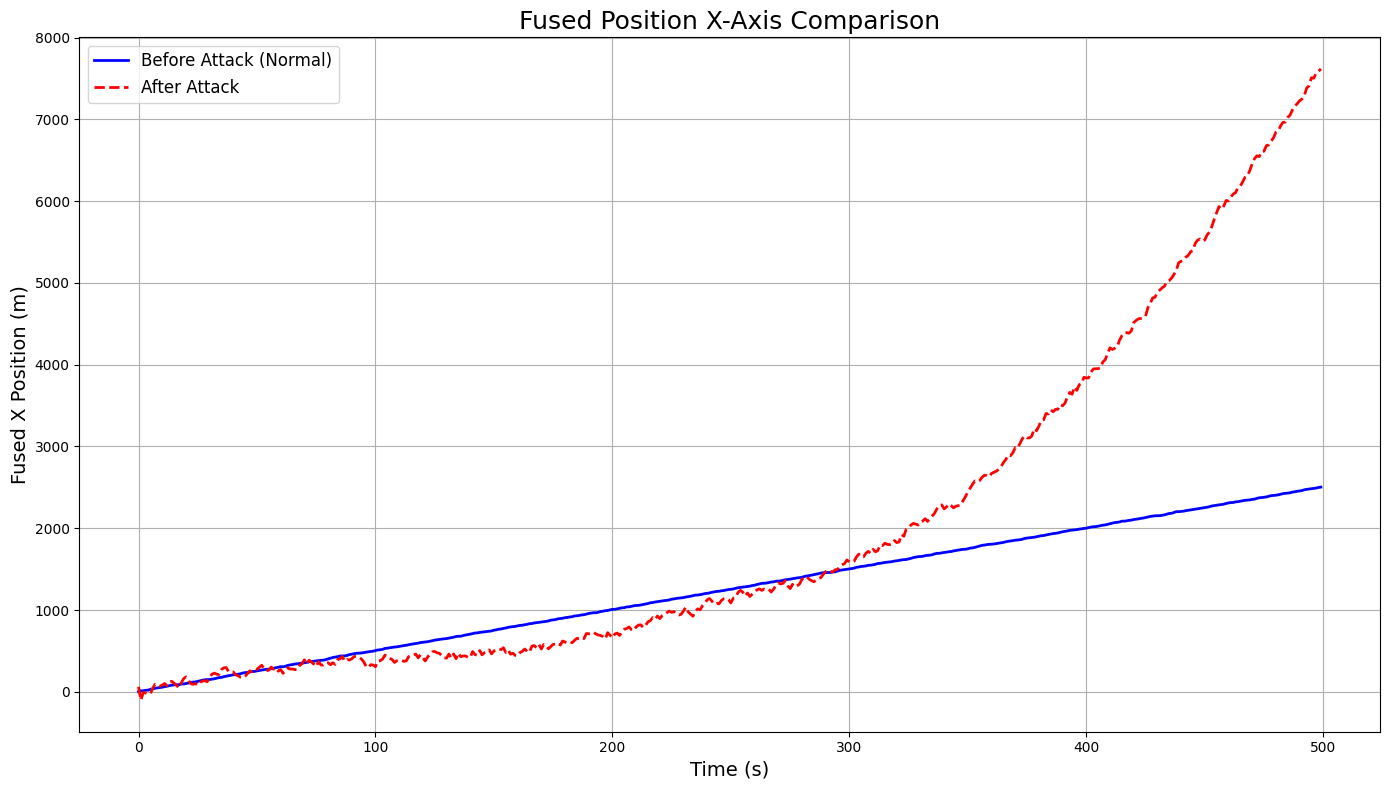

Running simulation for scenario: Normal
Running simulation for scenario: INS_Attack
Running simulation for scenario: Sonar_Attack
Running simulation for scenario: Depth_Attack
Running simulation for scenario: GPS_Attack
Running simulation for scenario: Collision_Attack
Running simulation for scenario: Autopilot_Attack
Running simulation for scenario: SensorFusion_Attack
Data has been saved to 'submarine_navigation_data.csv'.


In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from filterpy.kalman import KalmanFilter
import pandas as pd

# Module 1: Inertial Navigation System (INS) with Attack
class InertialNavigationSystem:
    def __init__(self, initial_position, initial_velocity):
        self.position = np.array(initial_position, dtype=float)
        self.velocity = np.array(initial_velocity, dtype=float)
        self.position_history = []
        self.velocity_history = []

    def update(self, acceleration, dt, attack=False):
        if attack:
            acceleration += np.random.normal(0, 0.5, size=2) + np.array([0.1, -0.1])
        self.velocity += np.array(acceleration) * dt
        self.position += self.velocity * dt
        self.velocity_history.append(self.velocity.copy())
        self.position_history.append(self.position.copy())
        return self.position

# Module 2: Sonar System with Attack
class SonarSystem:
    def __init__(self, obstacle_positions):
        self.obstacle_positions = obstacle_positions
        self.detections = []

    def detect_obstacles(self, submarine_position, attack=False):
        detections = []
        for obs_pos in self.obstacle_positions:
            distance = np.linalg.norm(obs_pos - submarine_position)
            if distance < 50:
                detections.append((obs_pos, distance))
        if attack:
            for _ in range(10):
                fake_pos = submarine_position + np.random.uniform(-50, 50, size=2)
                detections.append((fake_pos, np.linalg.norm(fake_pos - submarine_position)))
        self.detections.append(len(detections))
        return detections

# Module 3: Depth Control System with Attack
class DepthControlSystem:
    def __init__(self, target_depth):
        self.target_depth = target_depth
        self.current_depth = 0.0
        self.depth_history = []

    def adjust_depth(self, depth_sensor_reading, attack=False):
        if attack:
            depth_sensor_reading += np.random.uniform(-20, 20)
        depth_error = self.target_depth - depth_sensor_reading
        adjustment = depth_error * 0.1
        self.current_depth += adjustment
        self.depth_history.append(self.current_depth)
        return self.current_depth

# Module 4: GPS with Attack
class GPS:
    def __init__(self, position_noise_std):
        self.position_noise_std = position_noise_std
        self.position_history = []

    def get_position(self, true_position, attack=False):
        noisy_position = true_position + np.random.randn(2) * self.position_noise_std
        if attack:
            spoofing_error = np.random.uniform(-100, 100, size=2)
            noisy_position += spoofing_error
        self.position_history.append(noisy_position)
        return noisy_position

# Module 5: Collision Avoidance System with Attack
class CollisionAvoidanceSystem:
    def __init__(self):
        self.evasive_actions = []

    def avoid_collision(self, detections, attack=False):
        action_taken = False
        if detections and not attack:
            action_taken = True
        elif attack and random.random() < 0.3:
            action_taken = False
        self.evasive_actions.append(action_taken)
        return action_taken

# Module 6: Autopilot System with Attack
class AutopilotSystem:
    def __init__(self, target_course):
        self.target_course = target_course
        self.current_course = random.uniform(0, 360)
        self.course_history = []

    def adjust_course(self, attack=False):
        course_error = self.target_course - self.current_course
        adjustment = course_error * 0.1
        if attack:
            adjustment += np.random.uniform(-5, 5)
        self.current_course += adjustment
        self.course_history.append(self.current_course)
        return self.current_course

# Module 7: Sensor Fusion (Kalman Filter) with Attack
class SensorFusion:
    def __init__(self):
        self.kf = KalmanFilter(dim_x=4, dim_z=2)
        dt = 1.0
        self.kf.F = np.array([[1, dt, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, dt],
                              [0, 0, 0, 1]])
        self.kf.H = np.array([[1, 0, 0, 0],
                              [0, 0, 1, 0]])
        self.kf.P *= 1000
        self.kf.R = np.eye(2) * 5
        self.kf.Q = np.eye(4) * 0.1
        self.fused_positions = []

        self.kf.x = np.zeros(4)

    def update(self, measurement, attack=False):
        if attack:
            measurement += np.random.uniform(-50, 50, size=2)
        self.kf.predict()
        self.kf.update(measurement)
        position_estimate = self.kf.x[[0, 2]]
        self.fused_positions.append(position_estimate.copy())
        return position_estimate

# Main Navigation System with Attack Capability
class SubmarineNavigationSystem:
    def __init__(self, simulation_time, time_step):
        self.simulation_time = simulation_time
        self.time_step = time_step
        self.dt = time_step
        self.time_steps = int(simulation_time / time_step)
        self.time = np.arange(0, simulation_time, time_step)
        self.ins = InertialNavigationSystem([0.0, 0.0], [5.0, 0.0])
        self.sonar = SonarSystem([np.array([200, 50]), np.array([400, -100])])
        self.depth_control = DepthControlSystem(200.0)
        self.gps = GPS(5.0)
        self.collision_avoidance = CollisionAvoidanceSystem()
        self.autopilot = AutopilotSystem(90.0)
        self.sensor_fusion = SensorFusion()

    def simulate(self, attack_ins=False, attack_sonar=False, attack_depth=False, attack_gps=False, attack_collision=False, attack_autopilot=False, attack_sensor_fusion=False):
        for t in self.time:
            acceleration = [0.0, 0.0]
            ins_position = self.ins.update(acceleration, self.dt, attack=attack_ins)
            detections = self.sonar.detect_obstacles(ins_position, attack=attack_sonar)
            self.collision_avoidance.avoid_collision(detections, attack=attack_collision)
            depth_sensor_reading = self.depth_control.current_depth + np.random.randn() * 2.0
            self.depth_control.adjust_depth(depth_sensor_reading, attack=attack_depth)
            gps_position = self.gps.get_position(ins_position, attack=attack_gps)
            self.autopilot.adjust_course(attack=attack_autopilot)
            self.sensor_fusion.update(gps_position, attack=attack_sensor_fusion)

    def run_and_compare(self):
        # Run simulation under ideal conditions
        self.simulate()
        ins_positions_ideal = np.array(self.ins.position_history)
        sonar_detections_ideal = np.array(self.sonar.detections)
        depth_history_ideal = np.array(self.depth_control.depth_history)
        gps_positions_ideal = np.array(self.gps.position_history)
        course_history_ideal = np.array(self.autopilot.course_history)
        evasive_actions_ideal = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_ideal = np.array(self.sensor_fusion.fused_positions)

        # Run simulation before any attack (normal conditions)
        self.__init__(500.0, 1.0)  # Reset system
        self.simulate()
        ins_positions_normal = np.array(self.ins.position_history)
        sonar_detections_normal = np.array(self.sonar.detections)
        depth_history_normal = np.array(self.depth_control.depth_history)
        gps_positions_normal = np.array(self.gps.position_history)
        course_history_normal = np.array(self.autopilot.course_history)
        evasive_actions_normal = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_normal = np.array(self.sensor_fusion.fused_positions)

        # Run simulation with all attacks enabled
        self.__init__(500.0, 1.0)  # Reset system
        self.simulate(attack_ins=True, attack_sonar=True, attack_depth=True, attack_gps=True, attack_collision=True, attack_autopilot=True, attack_sensor_fusion=True)
        ins_positions_attacked = np.array(self.ins.position_history)
        sonar_detections_attacked = np.array(self.sonar.detections)
        depth_history_attacked = np.array(self.depth_control.depth_history)
        gps_positions_attacked = np.array(self.gps.position_history)
        course_history_attacked = np.array(self.autopilot.course_history)
        evasive_actions_attacked = np.array(self.collision_avoidance.evasive_actions).astype(int)
        fused_positions_attacked = np.array(self.sensor_fusion.fused_positions)

        # Plotting results
        self.plot_comprehensive_comparison(ins_positions_ideal[:, 0], ins_positions_normal[:, 0], ins_positions_attacked[:, 0], 'INS Position X-Axis Comparison', 'X Position (m)')
        self.plot_comprehensive_comparison(sonar_detections_ideal, sonar_detections_normal, sonar_detections_attacked, 'Sonar Detections Comparison', 'Number of Detections')
        self.plot_comprehensive_comparison(depth_history_ideal, depth_history_normal, depth_history_attacked, 'Depth Control Comparison', 'Depth (m)')
        self.plot_comprehensive_comparison([pos[0] for pos in gps_positions_ideal], [pos[0] for pos in gps_positions_normal], [pos[0] for pos in gps_positions_attacked], 'GPS X Position Comparison', 'GPS X Position (m)')
        self.plot_comprehensive_comparison(course_history_ideal, course_history_normal, course_history_attacked, 'Autopilot Course Comparison', 'Course (degrees)')
        self.plot_comprehensive_comparison(evasive_actions_ideal, evasive_actions_normal, evasive_actions_attacked, 'Collision Avoidance Actions', 'Evasive Action (1=True, 0=False)')
        self.plot_comprehensive_comparison([pos[0] for pos in fused_positions_ideal], [pos[0] for pos in fused_positions_normal], [pos[0] for pos in fused_positions_attacked], 'Fused Position X-Axis Comparison', 'Fused X Position (m)')

    def plot_comprehensive_comparison(self, ideal_data, normal_data, attacked_data, title, y_label):
        plt.figure(figsize=(14, 8))
        #plt.plot(self.time, ideal_data, label='Ideal', color='green', linewidth=2)
        plt.plot(self.time, normal_data, label='Before Attack (Normal)', color='blue', linewidth=2)
        plt.plot(self.time, attacked_data, label='After Attack', color='red', linestyle='--', linewidth=2)
        plt.title(title, fontsize=18)
        plt.xlabel('Time (s)', fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        
        # Function to generate CSV dataset
    def generate_csv_data(self):
        simulation_time = self.simulation_time
        time_step = self.time_step
        time = np.arange(0, self.simulation_time, self.time_step)

        # Prepare an empty list to collect data
        data_records = []

        # Define attack scenarios
        attack_scenarios = {
            'Normal': {},
            'INS_Attack': {'attack_ins': True},
            'Sonar_Attack': {'attack_sonar': True},
            'Depth_Attack': {'attack_depth': True},
            'GPS_Attack': {'attack_gps': True},
            'Collision_Attack': {'attack_collision': True},
            'Autopilot_Attack': {'attack_autopilot': True},
            'SensorFusion_Attack': {'attack_sensor_fusion': True},
        }

        # Run simulations for each scenario
        for scenario_name, attack_flags in attack_scenarios.items():
            print(f"Running simulation for scenario: {scenario_name}")
            submarine_system = SubmarineNavigationSystem(simulation_time, time_step)
            submarine_system.simulate(**attack_flags)

            # Collect data
            for i in range(len(time)):
                record = {
                    'Time': time[i],
                    'Position_X': submarine_system.ins.position_history[i][0],
                    'Position_Y': submarine_system.ins.position_history[i][1],
                    'Velocity_X': submarine_system.ins.velocity_history[i][0],
                    'Velocity_Y': submarine_system.ins.velocity_history[i][1],
                    'Sonar_Detections': submarine_system.sonar.detections[i],
                    'Depth': submarine_system.depth_control.depth_history[i],
                    'GPS_Position_X': submarine_system.gps.position_history[i][0],
                    'GPS_Position_Y': submarine_system.gps.position_history[i][1],
                    'Course': submarine_system.autopilot.course_history[i],
                    'Evasive_Action': submarine_system.collision_avoidance.evasive_actions[i],
                    'Fused_Position_X': submarine_system.sensor_fusion.fused_positions[i][0],
                    'Fused_Position_Y': submarine_system.sensor_fusion.fused_positions[i][1],
                    'Scenario': scenario_name
                }
                data_records.append(record)

            # Create DataFrame
        df = pd.DataFrame(data_records)

        #     # Save DataFrame to CSV file
        #     filename = f'{scenario_name}_data.csv'
        #     df.to_csv(filename, index=False)
        #     print(f"Data for scenario '{scenario_name}' has been saved to '{filename}'.")
    
        # print("All scenario data has been saved to separate CSV files.")

        # # Save DataFrame to CSV file
        df.to_csv('submarine_navigation_data.csv', index=False)

        print("Data has been saved to 'submarine_navigation_data.csv'.")


# Run the attack simulation
if __name__ == "__main__":
    submarine_system = SubmarineNavigationSystem(500.0, 1.0)
    submarine_system.run_and_compare()
    submarine_system.generate_csv_data()